In [3]:
import random
from collections import Counter
import math
from matplotlib import pyplot as plt

In [11]:
def normal_cdf(x,mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [8]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0
def binomial(n,p):
    return sum(bernoulli_trial(p) for _ in range(n))
def make_hist(p,n,num_points):
    data = [binomial(n,p) for _ in range(num_points)]
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    xs = range(min(data),max(data) + 1)
    ys = [normal_cdf(i + 0.5,mu,sigma) - normal_cdf(i - 0.5,mu,sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

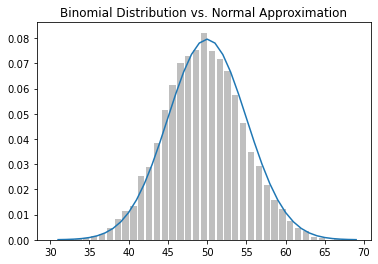

In [13]:
make_hist(0.50,100,10000)